In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

In [ ]:
df = pd.read_csv('/content/ushape (1).csv')

In [ ]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [ ]:
df.tail()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
94,1.699453,0.587720,1.0
95,0.218623,-0.652521,1.0
96,0.952914,-0.419766,1.0
97,-1.318500,0.423112,0.0
98,-1.296818,0.184147,0.0


In [ ]:
df.shape

(99, 3)

In [ ]:
df = df.rename(columns = {"3.159499363321345566e-02":"x","9.869877579082642072e-01": "y", "0.000000000000000000e+00":"label"})

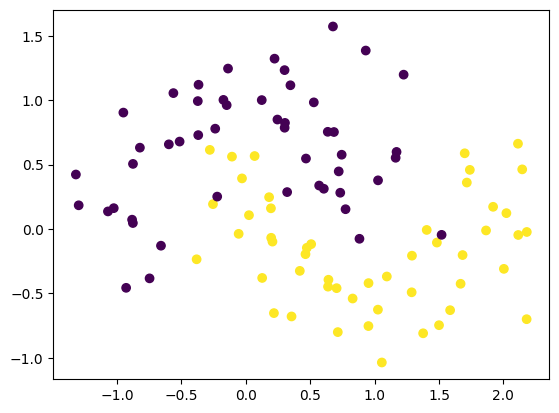

In [ ]:
plt.scatter(df['x'],df['y'],c = df['label'])

In [ ]:
x = df.drop('label',axis=1)
y = df['label']

In [ ]:
print(x)

           x         y
0   2.115098 -0.046244
1   0.882490 -0.075756
2  -0.055144 -0.037332
3   0.829545 -0.539321
4   2.112857  0.662084
..       ...       ...
94  1.699453  0.587720
95  0.218623 -0.652521
96  0.952914 -0.419766
97 -1.318500  0.423112
98 -1.296818  0.184147

[99 rows x 2 columns]


In [ ]:
print(y)

0     1.0
1     0.0
2     1.0
3     1.0
4     1.0
     ... 
94    1.0
95    1.0
96    1.0
97    0.0
98    0.0
Name: label, Length: 99, dtype: float64


In [ ]:
# model training
model = Sequential()
model.add(Dense(10,activation='tanh',input_dim = 2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.get_weights()

[array([[-0.07536972, -0.00370198,  0.5869852 , -0.09306949,  0.02443945,
         -0.0380699 ,  0.28902286, -0.44833794,  0.17593932, -0.56426585],
        [ 0.18892491, -0.490196  ,  0.6390098 ,  0.58801275,  0.3906172 ,
          0.1156292 ,  0.43086296, -0.37797174, -0.6857778 , -0.25516108]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-1.45339280e-01,  4.61672664e-01, -2.42069691e-01,
         -1.41063720e-01,  4.19170439e-01, -5.21160483e-01,
         -4.12918925e-01, -3.39649707e-01,  2.91675448e-01,
          4.72211003e-01],
        [-3.84555280e-01,  1.70413971e-01,  2.88131237e-01,
          3.65304589e-01, -1.20936334e-01,  2.80356586e-01,
          7.47308731e-02,  4.63187575e-01, -1.00860238e-01,
         -4.78325784e-01],
        [-2.46645212e-02,  2.49799132e-01,  3.12820315e-01,
          1.91865563e-02,  2.66251326e-01,  3.50301862e-01,
         -1.96903229e-01,  2.27323771e-02, -1.75326943e-01,
         -2.6561915

In [ ]:
initial_weights = model.get_weights()

In [ ]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/2)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/2)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/2)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/2)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.get_weights()

[array([[ 0.54654425, -0.7346393 , -1.1386589 ,  0.2027862 ,  1.4219987 ,
         -1.1242055 ,  0.11553135, -0.9761484 ,  1.6728144 , -1.1013868 ],
        [ 0.32849252, -0.47737238,  1.5244957 , -1.4631319 , -1.0493499 ,
         -0.54888666,  0.41530165, -0.50750303, -0.43075758, -0.05498262]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 4.5845836e-01, -9.9564844e-01, -5.4235834e-01,  6.0844678e-01,
         -3.2794023e-01,  7.6473552e-01,  1.8457718e-01,  4.2700163e-01,
         -1.1502717e+00,  2.8176650e-01],
        [-2.6634702e-01,  1.2773082e-01,  5.1961374e-01,  5.7383430e-01,
          9.5414788e-01, -2.5309592e-01,  6.9100654e-01,  1.8304768e-01,
          4.8022810e-01, -5.4188248e-02],
        [-9.0288174e-01,  9.2278570e-01,  1.1557298e+00, -6.5778154e-01,
         -1.1068178e+00,  1.7013285e-01,  3.9221910e-01, -9.1624945e-01,
          4.3544877e-02, -2.5806442e-01],
        [ 3.2262579e-01,  1.6549703e+00, -1.16201

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.1785 - loss: 1.3874 - val_accuracy: 0.1000 - val_loss: 1.4102
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1511 - loss: 1.3230 - val_accuracy: 0.1000 - val_loss: 1.3204
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1877 - loss: 1.1971 - val_accuracy: 0.1000 - val_loss: 1.2344
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.1550 - loss: 1.1551 - val_accuracy: 0.1000 - val_loss: 1.1520
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2224 - loss: 1.0417 - val_accuracy: 0.1000 - val_loss: 1.0719
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2248 - loss: 1.0010 - val_accuracy: 0.1000 - val_loss: 0.9926
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.1999 - loss: 0.9657 - val_accuracy: 0.1500 - val_loss: 0.9154
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2706 - loss: 0.8802 - val_accuracy: 0.2000 - val_loss

In [ ]:
model.get_weights()

[array([[ 0.6885191 , -0.84144515, -1.2297417 ,  0.29657418,  1.2498854 ,
         -1.0386978 ,  0.02284111, -1.1037714 ,  1.7171344 , -1.1700611 ],
        [ 0.354414  , -0.3940154 ,  1.4690417 , -1.4526582 , -1.1287682 ,
         -0.46132252,  0.4439861 , -0.4958008 , -0.35057837, -0.07703963]],
       dtype=float32),
 array([ 0.0033137 , -0.02668164,  0.01569141, -0.03425378, -0.02729415,
        -0.00197539, -0.07330737, -0.03752667, -0.10765488, -0.19774996],
       dtype=float32),
 array([[ 0.5280315 , -1.0319983 , -0.59453744,  0.59758145, -0.43640527,
          0.7440057 ,  0.20574014,  0.41875568, -1.2130165 ,  0.25908214],
        [-0.343042  ,  0.16590278,  0.55808336,  0.5755308 ,  1.0628103 ,
         -0.2256158 ,  0.66324675,  0.17188498,  0.54570246, -0.05541248],
        [-0.875485  ,  0.8676078 ,  1.2758281 , -0.5902812 , -1.0232127 ,
          0.22264192,  0.4643014 , -0.9208597 ,  0.15615934, -0.14694184],
        [ 0.27561998,  1.725736  , -0.16444291, -0.4001959 , 

In [ ]:
from mlxtend.plotting import plot_decision_regions


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 948us/step


<Axes: >

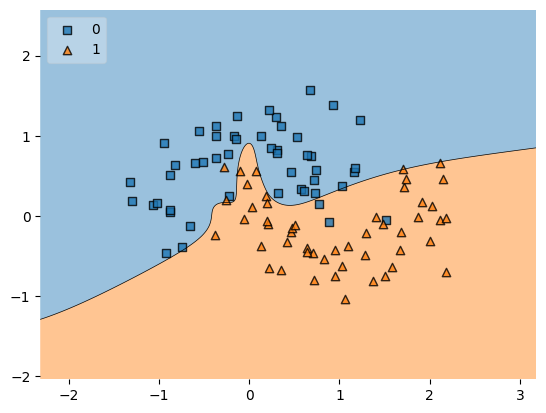

In [ ]:
plot_decision_regions(x.values,y.astype('int').values,clf=model,legend=2)